In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [6]:
from sklearn.cluster import SpectralClustering
sp = SpectralClustering(n_clusters=5,affinity= 'rbf',assign_labels='discretize',random_state=0)
label_rbf=sp.fit_predict(X_principal)
sp.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1,
       4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1,
       1, 4, 1, 2, 4, 2, 2, 1, 2, 4, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2, 0,
       3, 3, 2, 2, 0, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 0, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0])

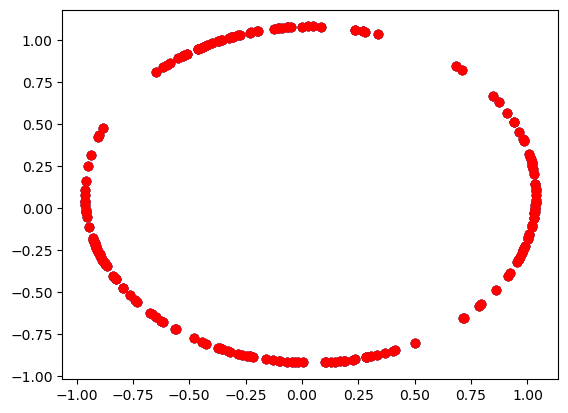

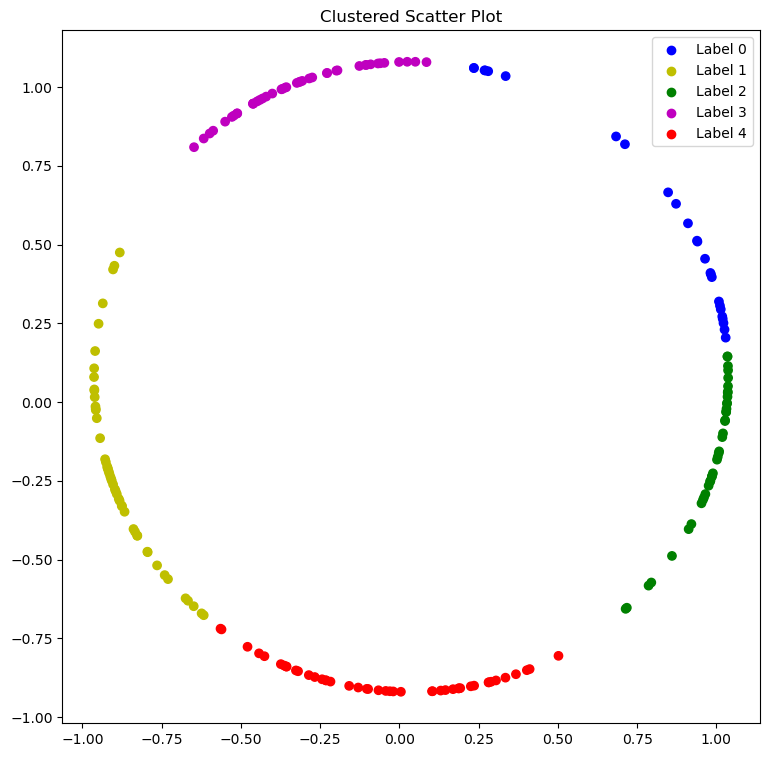

In [7]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
colours[2]= 'g'
colours[3]= 'm'
colours[4]= 'r'
# Building the colour vector for each data point
cvec = [colours[label] for label in label_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
m = plt.scatter(X_principal['P1'], X_principal['P2'], color ='m');
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');



plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y,g,m,r), ('Label 0', 'Label 1','Label 2', 'Label 3','Label 4'))
plt.title('Clustered Scatter Plot')
plt.show()

In [8]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=label_rbf
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


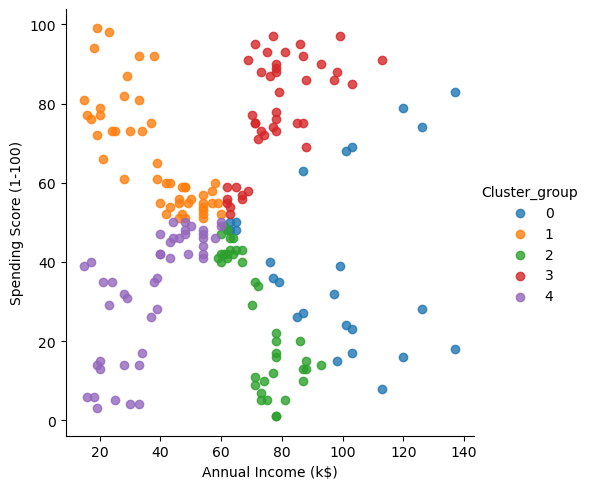

In [9]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)